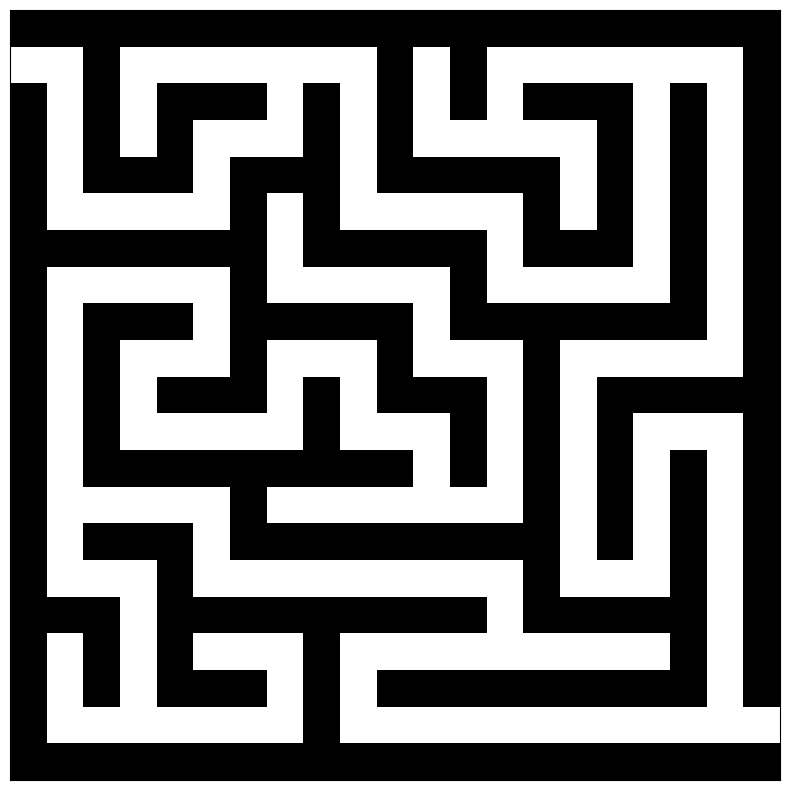

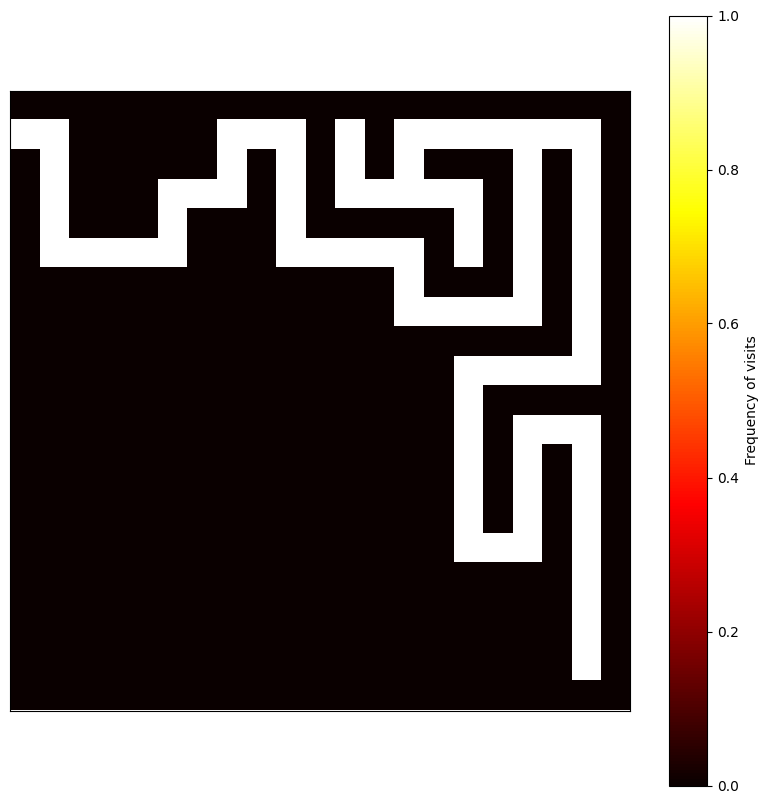

In [42]:
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

class Maze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.ones((height, width), dtype=int)  # Walls are 1, paths are 0
        self.generate_maze()

    def generate_maze(self):
        # Start maze generation with a recursive backtracking algorithm
        self._recursive_backtracker(1, 1)
        # Ensure start and end points
        self.grid[1, 0] = 0  # Entry
        self.grid[self.height - 2, self.width - 1] = 0  # Exit

    def _recursive_backtracker(self, x, y):
        self.grid[y, x] = 0  # Mark the current cell as a path
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = x + dx * 2, y + dy * 2
            if 1 <= nx < self.width - 1 and 1 <= ny < self.height - 1 and self.grid[ny, nx] == 1:
                self.grid[ny - dy, nx - dx] = 0  # Knock down the wall
                self._recursive_backtracker(nx, ny)

    def display(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.grid, cmap='binary')
        plt.xticks([]), plt.yticks([])  # Remove ticks
        plt.show()

class QuantumWalk2D:
    def __init__(self, maze):
        self.maze = maze
        self.state = np.zeros((maze.height, maze.width))
        self.position = (1, 0)
        self.state[1, 0] = 1

    def dfs(self, x, y, visited):
        if (x, y) == (self.maze.width - 2, self.maze.height - 2):
            return True  # Reached the goal

        visited.add((x, y))
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        random.shuffle(directions)  # Randomize the directions

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 1 <= nx < self.maze.width - 1 and 1 <= ny < self.maze.height - 1 and self.maze.grid[ny, nx] == 0 and (nx, ny) not in visited:
                self.state[ny, nx] += 1
                self.position = (nx, ny)
                if self.dfs(nx, ny, visited):
                    return True

        return False

    def solve_maze(self):
        visited = set()
        self.dfs(1, 0, visited)

    def display(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.state, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Frequency of visits')
        plt.xticks([]), plt.yticks([])  # Remove ticks
        plt.show()

# Create a maze and a quantum walk instance
maze = Maze(21, 21)
maze.display()

quantum_walk = QuantumWalk2D(maze)
quantum_walk.solve_maze()
quantum_walk.display()
